# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir("//content//drive//My Drive//ACV")

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load("images.npy",allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)

In [4]:
data.shape

(409, 2)

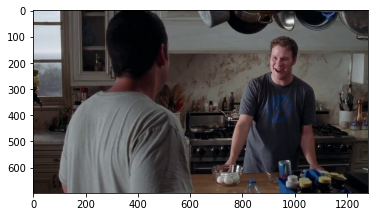

In [5]:
from matplotlib import pyplot as plt
plt.imshow(data[1,0], cmap='gray')
plt.show()


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
#Initializing the variables
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

ALPHA = 1.0

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [8]:
X_train.shape
#There are around 409 images with the image size as initailized above by us.

(409, 224, 224, 3)

In [9]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

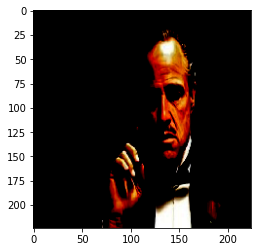

In [11]:
from matplotlib import pyplot
n = 10   # Displaying the 10th image and its array 
print(X_train[n])
pyplot.imshow(X_train[n])

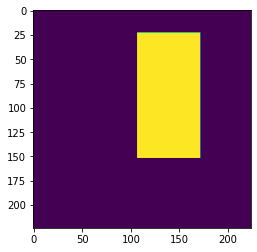

In [0]:
pyplot.imshow(masks[n]) #The corresponding mask of 10th sample

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

In [0]:
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3), include_top=False, alpha=ALPHA, weights="imagenet") # Load pre-trained mobilenet

    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####

    #DownSampling 
    block0 = model.get_layer("conv_pw_1_relu").output 
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    #UpSampling
    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x) # Here we are using "Sigmoid" as an activation layer 

    x = Reshape((IMAGE_WIDTH, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [12]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
#Here using Dice score - which is usually used to quantify the performance for Image segmentation methods - which measures how similar the objects are.
#So it is the size of the overlap of the two segmentations divided by the total size of the two objects.
#Here it will help us to understand the performance of our model which is predicting the mask as compared to ground truth. 

from tensorflow.keras import backend as K

smooth = 1.
def dice_coefficient(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient]) 

### Define checkpoint and earlystopping

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)

#Early stopping - once the model has reached min loss, Model execution would be interrupted with no improvement after 5 epochs 
stop = EarlyStopping(monitor="loss", patience=5, mode="min") 

#ReduceLROnPlateau - Here Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
#This callback monitors a quantity(in this model - Loss) and if no improvement is seen for a 'patience' number of epochs, that is , when the loss has
#stopped decreasing, the learning rate is reduced.
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [19]:
#Here features = X_train dataset and Labels = masks
model.fit(X_train,masks,
                    epochs=50,
                    batch_size = 1,
                    callbacks=[checkpoint, reduce_lr, stop],
                    shuffle=True,
                    verbose=1)

Epoch 1/50
409/409 [==============================] - ETA: 0s - loss: 1.2142 - dice_coefficient: 0.5039
Epoch 00001: loss improved from inf to 1.21422, saving model to model-1.21.h5
409/409 [==============================] - 31s 75ms/step - loss: 1.2142 - dice_coefficient: 0.5039 - lr: 0.0010
Epoch 2/50
409/409 [==============================] - ETA: 0s - loss: 0.8214 - dice_coefficient: 0.6061
Epoch 00002: loss improved from 1.21422 to 0.82141, saving model to model-0.82.h5
409/409 [==============================] - 31s 75ms/step - loss: 0.8214 - dice_coefficient: 0.6061 - lr: 0.0010
Epoch 3/50
409/409 [==============================] - ETA: 0s - loss: 0.7134 - dice_coefficient: 0.6421
Epoch 00003: loss improved from 0.82141 to 0.71335, saving model to model-0.71.h5
409/409 [==============================] - 32s 77ms/step - loss: 0.7134 - dice_coefficient: 0.6421 - lr: 0.0010
Epoch 4/50
409/409 [==============================] - ETA: 0s - loss: 0.6358 - dice_coefficient: 0.6719
Epoch 

In [0]:
#Observation - model training stopped as we have used Early stopping with patience = 5 , the loss was not reduced after epoch 16.

### Get the predicted mask for a sample image   (3 marks)

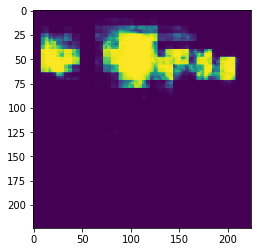

In [22]:
n = 11
sample_image = X_train[n]
resized_sample_image = np.expand_dims(sample_image, axis=0)
mask = model.predict(resized_sample_image) #Predicting the mask for the sample image 
mask = np.reshape(mask,(224,224))
plt.imshow(mask)


### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


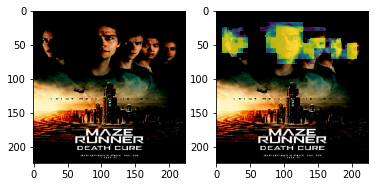

In [23]:
masked = np.ma.masked_where(mask < 0.1, mask)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample_image)
plt.subplot(1,2,2)
plt.imshow(sample_image)
plt.imshow(masked,alpha=0.8)
plt.show()

In [0]:
#Observation -  Here we can say that , the model is performing quite well and has predicted the masks most correctly.